In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [19]:
df = pd.read_csv('../1d_runtime/runtime_comparison_multidim.csv')
df.head()

,p,contamination_level,ctam_sigma,ctam_mu,ols_avg_runtime,ols_diag_avg_runtime,m_estimator_avg_runtime,mm_estimator_avg_runtime,s_estimator_avg_runtime
0,1,0.0,1,0,0.000756,0.001028,0.001857,0.030694,0.029243
1,1,0.2,1,0,0.000622,0.000955,0.002163,0.030165,0.029522
2,1,0.4,1,0,0.000734,0.000953,0.001995,0.030442,0.029904
3,1,0.6,1,0,0.000538,0.001155,0.001851,0.030611,0.030176
4,5,0.0,1,0,0.000892,0.001308,0.002340,0.046263,0.045944


In [20]:
df.columns

Index(['p', 'contamination_level', 'ctam_sigma', 'ctam_mu', 'ols_avg_runtime',
       'ols_diag_avg_runtime', 'm_estimator_avg_runtime',
       'mm_estimator_avg_runtime', 's_estimator_avg_runtime'],
      dtype='object')

In [21]:
feature_cols = ['p', 'contamination_level', 'ctam_sigma', 'ctam_mu']
runtime_cols = ['ols_avg_runtime', 'ols_diag_avg_runtime', 'm_estimator_avg_runtime', 'mm_estimator_avg_runtime', 's_estimator_avg_runtime']

df_melted = df.melt(id_vars=feature_cols, value_vars=runtime_cols, var_name='method', value_name='runtime')
df_melted['method'] = df_melted['method'].str.replace('_avg_runtime', '')
df_melted.head()
df_melted['runtime'] = np.log(df_melted['runtime'])

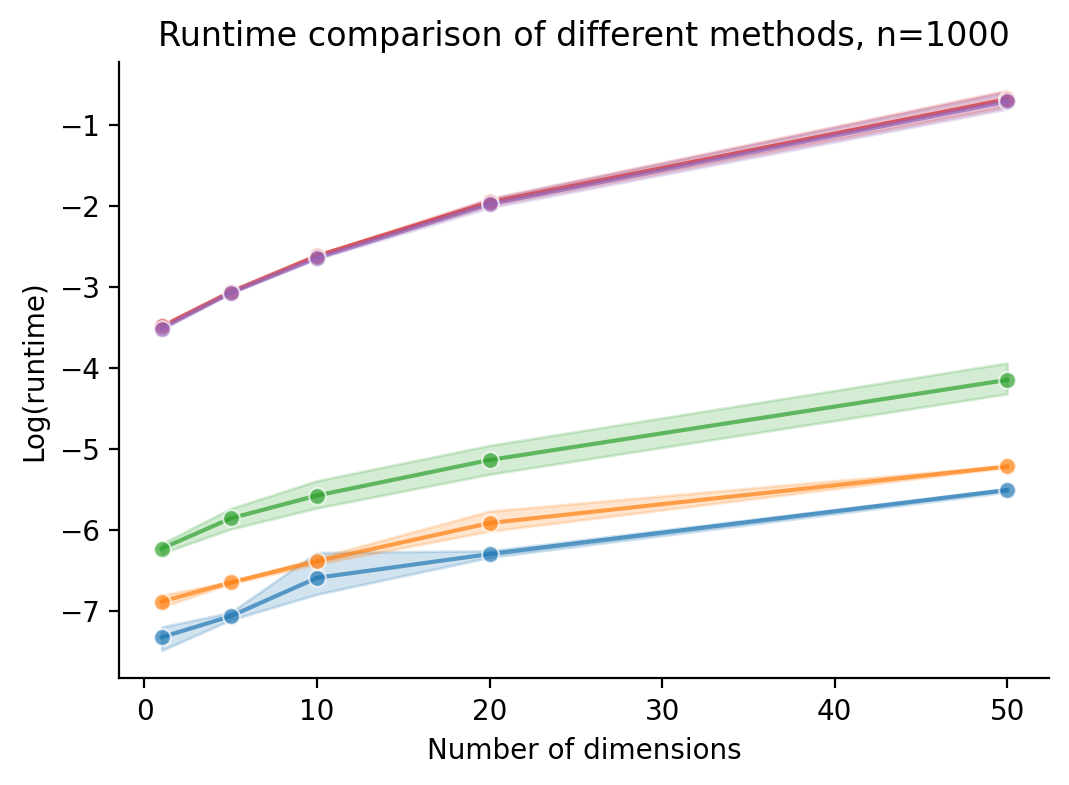

In [30]:
plt.figure(figsize=(6, 4), dpi=200)
sns.lineplot(data=df_melted, x='p', y='runtime', hue='method', marker='o', alpha=0.7)
# put the legend out of the figure
plt.title('Runtime comparison of different methods, n=1000')
plt.xlabel('Number of dimensions')
plt.ylabel('Log(runtime)')
# remove legend 
plt.legend().remove()
# remove top and right spines
sns.despine()